# A Day in the Life (of a Python Data Scientist)
``@__mharrison__``

In [3]:
class Tweet(object):
    def __init__(self, embed_str=None):
        self.embed_str = embed_str

    def _repr_html_(self):
        return self.embed_str

s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">In Data Science, 80% of time spent prepare data, 20% of time spent complain about need for prepare data.</p>&mdash; Big Data Borat (@BigDataBorat) <a href="https://twitter.com/BigDataBorat/status/306596352991830016?ref_src=twsrc%5Etfw">February 27, 2013</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")

In [4]:
Tweet("""
<a href="https://www.amazon.com/Illustrated-Guide-Python-Walkthrough-Illustrations/dp/1977921752/ref=as_li_ss_il?ie=UTF8&linkCode=li2&tag=pythonnotebook-20&linkId=82cb0f0aab6f7ad418b04ec98856bbec" target="_blank"><img border="0" src="//ws-na.amazon-adsystem.com/widgets/q?_encoding=UTF8&ASIN=1977921752&Format=_SL160_&ID=AsinImage&MarketPlace=US&ServiceVersion=20070822&WS=1&tag=pythonnotebook-20" ></a><img src="https://ir-na.amazon-adsystem.com/e/ir?t=pythonnotebook-20&l=li2&o=1&a=1977921752" width="1" height="1" border="0" alt="" style="border:none !important; margin:0px !important;" />
<!--<iframe style="width:120px;height:240px;" marginwidth="0" marginheight="0" scrolling="no" frameborder="0" src="//ws-na.amazon-adsystem.com/widgets/q?ServiceVersion=20070822&OneJS=1&Operation=GetAdHtml&MarketPlace=US&source=ss&ref=as_ss_li_til&ad_type=product_link&tracking_id=pythonnotebook-20&marketplace=amazon&region=US&placement=1977921752&asins=1977921752&linkId=df0298114b7f5e9996feb2b4618be713&show_border=true&link_opens_in_new_window=true"></iframe>
-->
""")

In [5]:
Tweet(s)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble, model_selection, preprocessing, tree
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

/Users/matt/.env/36/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


https://www.kaggle.com/mczielinski/bitcoin-historical-data

In [15]:
%%time
bit_df = pd.read_csv('../ORA-ML-Class-Reg/data/coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')
bit_df['date'] = pd.to_datetime(bit_df.Timestamp, unit='s')

CPU times: user 2.47 s, sys: 333 ms, total: 2.81 s
Wall time: 3.19 s


In [25]:
%%time
bit_df = pd.read_csv('../ORA-ML-Class-Reg/data/coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')
bit_df['date'] = pd.to_datetime(bit_df.Timestamp, unit='s')
bit_df = (
    bit_df.set_index('date')
        .rename(columns={'Open':'open', 'High': 'hi', 'Low': 'lo', 
                       'Close': 'close', 'Volume_(BTC)': 'vol_btc',
                       'Volume_(Currency)': 'vol_cur', 
                       'Weighted_Price': 'wp', 'Timestamp': 'ts'})
        .resample('d')
        .agg({'open': 'first', 'hi': 'mean', 
    'lo': 'mean', 'close': 'last', 'vol_btc': 'sum',
    'vol_cur': 'sum', 'wp': 'mean', 'ts': 'min'})
    .iloc[-1000:]
    .assign(buy = lambda x: (x.close.shift(-1) > x.close).astype(int))
    .iloc[:-1]
    
)


CPU times: user 2.64 s, sys: 513 ms, total: 3.16 s
Wall time: 3.87 s


In [23]:
print(dir(bit_df))

['Close', 'High', 'Low', 'Open', 'T', 'Timestamp', 'Weighted_Price', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmo

In [8]:
bit_df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
1,1417412040,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2,1417412100,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
3,1417412160,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
4,1417412220,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
5,1417412280,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
6,1417412340,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
7,1417412400,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
8,1417412460,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
9,1417412520,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000


In [11]:
bit_df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [12]:
pd.to_datetime(bit_df.Timestamp, unit='s')

0         2014-12-01 05:33:00
1         2014-12-01 05:34:00
2         2014-12-01 05:35:00
3         2014-12-01 05:36:00
4         2014-12-01 05:37:00
5         2014-12-01 05:38:00
6         2014-12-01 05:39:00
7         2014-12-01 05:40:00
8         2014-12-01 05:41:00
9         2014-12-01 05:42:00
10        2014-12-01 05:43:00
11        2014-12-01 05:44:00
12        2014-12-01 05:45:00
13        2014-12-01 05:46:00
14        2014-12-01 05:47:00
15        2014-12-01 05:48:00
16        2014-12-01 05:49:00
17        2014-12-01 05:50:00
18        2014-12-01 05:51:00
19        2014-12-01 05:52:00
20        2014-12-01 05:53:00
21        2014-12-01 05:54:00
22        2014-12-01 05:55:00
23        2014-12-01 05:56:00
24        2014-12-01 05:57:00
25        2014-12-01 05:58:00
26        2014-12-01 05:59:00
27        2014-12-01 06:00:00
28        2014-12-01 06:01:00
29        2014-12-01 06:02:00
                  ...        
1574244   2018-01-07 23:31:00
1574245   2018-01-07 23:32:00
1574246   

## Random Forest

In [33]:
ignore = {'buy'}
cols = [c for c in bit_df.columns if c not in ignore]
X = bit_df[cols]
y = bit_df.buy
X_train, X_test, y_train, y_test = model_selection.\
    train_test_split(X, y, test_size=.3, random_state=42)


In [50]:
rf1 = ensemble.RandomForestClassifier(random_state=42)
rf1.fit(X_train, y_train)
rf1.score(X_test, y_test)

0.49666666666666665

In [37]:
rf1.score(X_train, y_train)

0.977110157367668

## ROC Curve

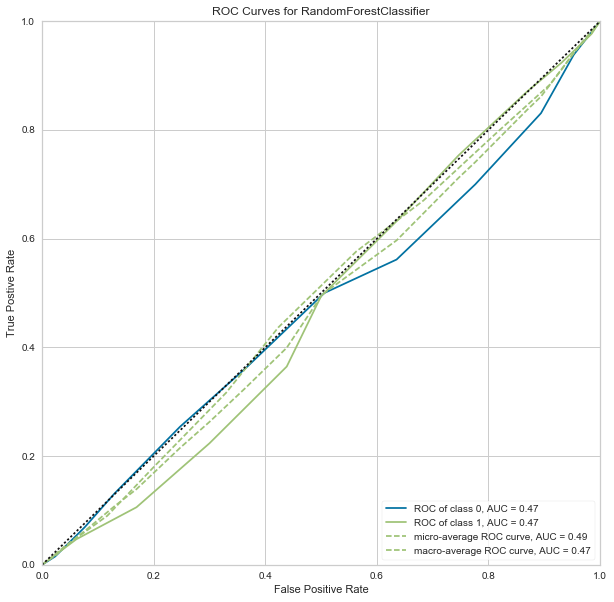

In [40]:
# yellowbrick version
fig, ax = plt.subplots(figsize=(10, 10))
roc_viz = ROCAUC(rf1)
roc_viz.score(X_test, y_test)
#roc_viz.score(X_train, y_train)

roc_viz.poof()

date
2015-04-15    1
2015-04-16    0
2015-04-17    1
2015-04-18    1
2015-04-19    1
2015-04-20    1
2015-04-21    0
2015-04-22    1
2015-04-23    0
2015-04-24    0
2015-04-25    0
2015-04-26    1
2015-04-27    0
2015-04-28    0
2015-04-29    1
2015-04-30    0
2015-05-01    1
2015-05-02    1
2015-05-03    0
2015-05-04    0
2015-05-05    0
2015-05-06    1
2015-05-07    1
2015-05-08    0
2015-05-09    0
2015-05-10    1
2015-05-11    0
2015-05-12    0
2015-05-13    1
2015-05-14    1
             ..
2017-12-09    0
2017-12-10    1
2017-12-11    1
2017-12-12    0
2017-12-13    1
2017-12-14    1
2017-12-15    1
2017-12-16    0
2017-12-17    0
2017-12-18    0
2017-12-19    0
2017-12-20    0
2017-12-21    0
2017-12-22    1
2017-12-23    0
2017-12-24    0
2017-12-25    1
2017-12-26    0
2017-12-27    0
2017-12-28    1
2017-12-29    0
2017-12-30    1
2017-12-31    0
2018-01-01    1
2018-01-02    1
2018-01-03    1
2018-01-04    1
2018-01-05    1
2018-01-06    0
2018-01-07    0
Freq: D, Name: buy,